<h1 style="text-align:center"><span style="color:blue">2023 Stack Overflow Developers' Survey EDA</span></h1>

In [ ]:
#Importing our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Importing the dataset
data = pd.read_csv(r"C:\Users\DELL\Desktop\ML_Projects\survey_results_public_EDA.csv")

In [3]:
# Let’s have a quick look at our dataset
pd.set_option('display.max_columns', None)
data.head(3)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [4]:
# Checking the shape of the data
data.shape

(89184, 84)

**A total of 89,184 individuals (organized as rows) contributed at most 84 responses each to various questions (arranged as columns). Each column in the data set represents the questions that were asked during the survey.**

<h2 style="text-align:center"><u>Data Cleaning</u></h2>

In [5]:
#Checking for duplicates
data.duplicated(subset = "ResponseId").sum()

0

**No duplicated records found**

In [6]:
# Checking the basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [7]:
# Checking for the number of unique responses each question received, by looping through each 84 columns
for i in data.columns :
    print(f"{i} : {data[i].nunique()}")

ResponseId : 89184
Q120 : 1
MainBranch : 6
Age : 8
Employment : 106
RemoteWork : 3
CodingActivities : 116
EdLevel : 8
LearnCode : 790
LearnCodeOnline : 7940
LearnCodeCoursesCert : 210
YearsCode : 52
YearsCodePro : 52
DevType : 33
OrgSize : 10
PurchaseInfluence : 3
TechList : 3
BuyNewTool : 231
Country : 185
Currency : 144
CompTotal : 3828
LanguageHaveWorkedWith : 32641
LanguageWantToWorkWith : 29602
DatabaseHaveWorkedWith : 11096
DatabaseWantToWorkWith : 10485
PlatformHaveWorkedWith : 5920
PlatformWantToWorkWith : 4963
WebframeHaveWorkedWith : 15144
WebframeWantToWorkWith : 14620
MiscTechHaveWorkedWith : 10322
MiscTechWantToWorkWith : 11775
ToolsTechHaveWorkedWith : 33133
ToolsTechWantToWorkWith : 27456
NEWCollabToolsHaveWorkedWith : 21262
NEWCollabToolsWantToWorkWith : 13659
OpSysPersonal use : 3050
OpSysProfessional use : 2470
OfficeStackAsyncHaveWorkedWith : 6258
OfficeStackAsyncWantToWorkWith : 3754
OfficeStackSyncHaveWorkedWith : 6925
OfficeStackSyncWantToWorkWith : 4078
AISearchH

In [8]:
print('RemoteWork:',data.RemoteWork.unique()) 

RemoteWork: [nan 'Remote' 'Hybrid (some remote, some in-person)' 'In-person']


In [9]:
# Replacing and renaming of data
data.RemoteWork = data.RemoteWork.replace("Hybrid (some remote, some in-person)", "Hybrid")
data.rename(columns = {'Age' : 'Age Group'}, inplace = True)

In [10]:
# Getting the statistical description of the dataset
data.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [11]:
#let's check the percentage of null values in each column
pd.set_option('display.max_rows', None)
(data.isna().sum()/ len(data) * 100).sort_values(ascending = False)

AINextVery similar                     97.061132
AINextSomewhat similar                 93.005472
AINextNeither different nor similar    92.600691
AINextVery different                   85.803507
AIDevWantToWorkWith                    78.037540
AIToolNot interested in Using          76.375807
AINextSomewhat different               73.870874
AIDevHaveWorkedWith                    70.954431
AIToolInterested in Using              63.241164
AIToolCurrently Using                  59.480400
Industry                               58.766146
LearnCodeCoursesCert                   58.427521
AIAcc                                  56.725422
Frequency_3                            53.967079
Knowledge_8                            53.574632
Knowledge_7                            53.503992
Knowledge_6                            53.444564
Knowledge_5                            53.436715
Knowledge_2                            53.276372
Knowledge_4                            53.260675
ProfessionalTech    

**A good percentage of participants didn't respond to AI related questions; also more than 95% of the respondents missed at least one question and the number of missing data varies with each question This could be because certain questions are optional, or lack of knowledge of the subject matter, or due to time constraints, survey fatigue, privacy concerns etc.**

<h2 style="text-align:center"><u>Exploratory Analysis & Visualization</u></h2>


<h3><span style="color:blue">Survey Perception</span></h3>
<hr>


**Question 1:** What's the respondents' perception of the overall survey?

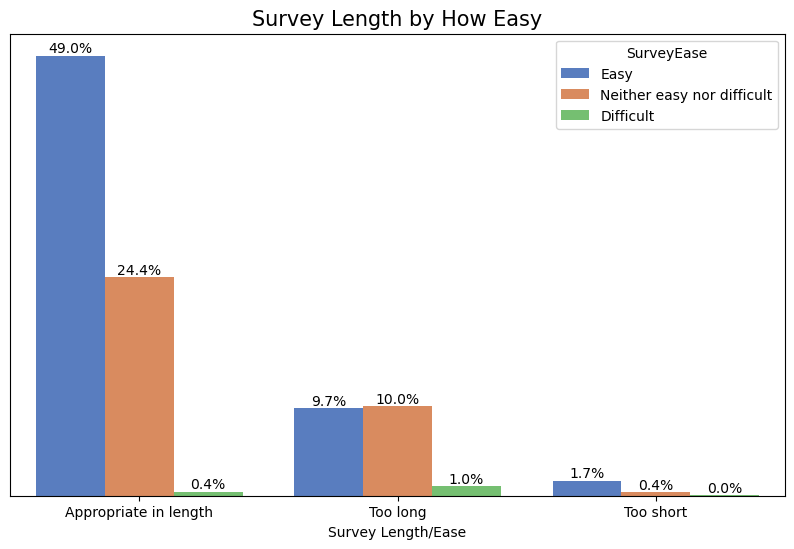

In [12]:
plt.figure(figsize=(10,6))
lp = sns.countplot(x = data.SurveyLength, hue = data.SurveyEase, palette = 'muted')

#Calculating the percentage value
totalCount = len(data)
for i in lp.patches:
    height = i.get_height()
    percentage = (height / totalCount) * 100
    lp.annotate(f'{percentage:.1f}%', (i.get_x() + i.get_width() / 2., height), ha='center', va='bottom')

plt.title('Survey Length by How Easy', fontsize=15)
plt.xlabel('Survey Length/Ease')
plt.ylabel('')
lp.set_yticks([])
plt.show()

**Majority of the respondents feel the survey is okay in ease and length; although few thought it long but a lesser number said it difficult. There's also a possibility that some inability to finish the survey(due to lengthy or difficult questions) resulted to most of the null responses.**

<h3><span style="color:blue">Respondents' Demographics</span></h3><hr>


**<u>Question 1</u>:** What is the age distribution of participants in the survey?

Text(0, 0.5, '')

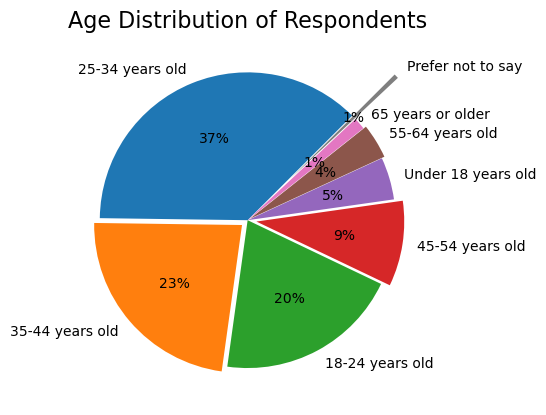

In [13]:
data['Age Group'].value_counts().plot(kind = 'pie', explode = [0,0.05,0,0.06,0,0.02,0,0.4], autopct = '%.0f%%', startangle=45)
plt.title("Age Distribution of Respondents", fontsize=16) 
plt.ylabel('')

**<u>Question 2</u>:** What are the top 15 countries with the highest number of responses in the survey?

Text(0.5, 0, 'Country')

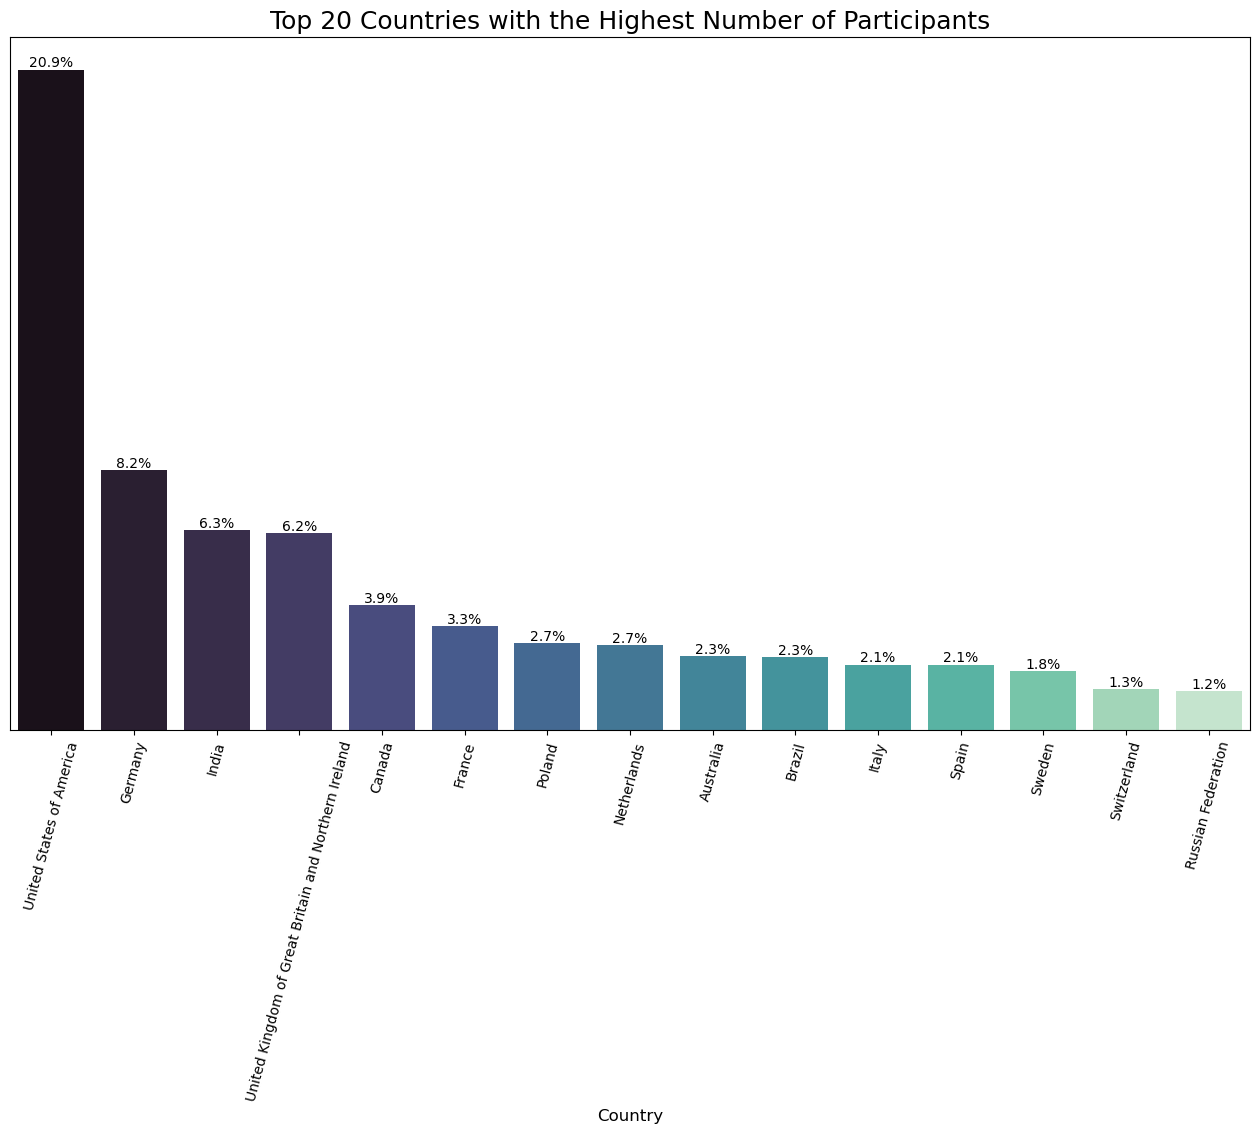

In [14]:
top_15_countries = data.Country.value_counts().sort_values(ascending=False).head(15)
top_15_countries

plt.figure(figsize=(16,9))
lp = sns.barplot(x=top_15_countries.index, y= top_15_countries, palette = 'mako')

#Calculating the percentage value
totalCount = len(data.Country)
for i in lp.patches:
    height = i.get_height()
    percentage = (height / totalCount) * 100
    lp.annotate(f'{percentage:.1f}%', (i.get_x() + i.get_width() / 2., height), ha='center', va='bottom')


plt.xticks(rotation=75)
lp.set_yticks([])
plt.title('Top 20 Countries with the Highest Number of Participants', fontsize=18)
plt.ylabel('')
plt.xlabel('Country', fontsize=12)

**U.S.A topped the chart with a significant 20.9% out of 89,184 participants, seconded by Germany at 8.2%**

**<u>Question 3</u>:** Are all Stack Overflow users Developers by Profession?

Text(0.5, 0, 'No of Respondents')

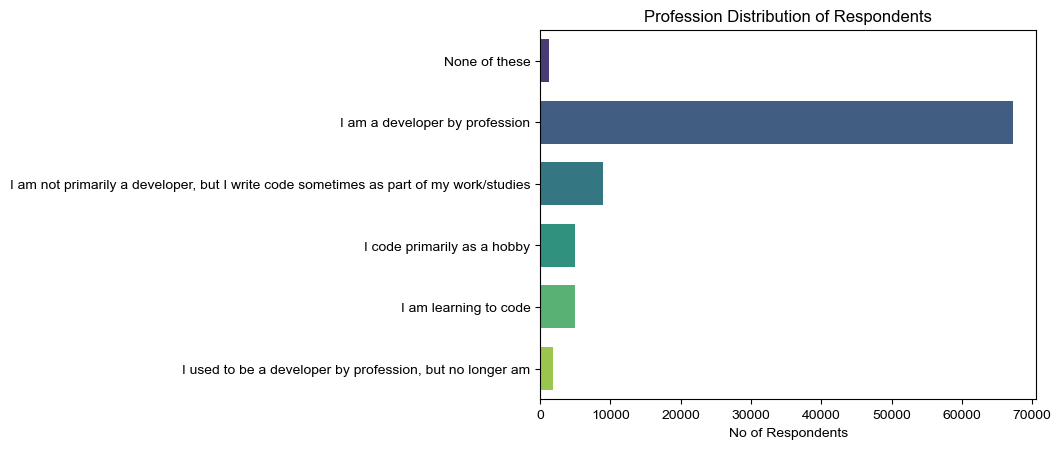

In [15]:
sns.countplot(y = 'MainBranch', data = data, width = 0.7, palette = 'viridis')
sns.set_theme(style="whitegrid")
    
plt.title('Profession Distribution of Respondents')
plt.ylabel('')
plt.xlabel('No of Respondents')

**Majority of the Respondents are Professional Developers, but almost everyone have coded at a time.**

**<u>Question 4</u>:** Does Age affect the coding expertise of respondents?

Text(0.5, 0, 'No of Respondents')

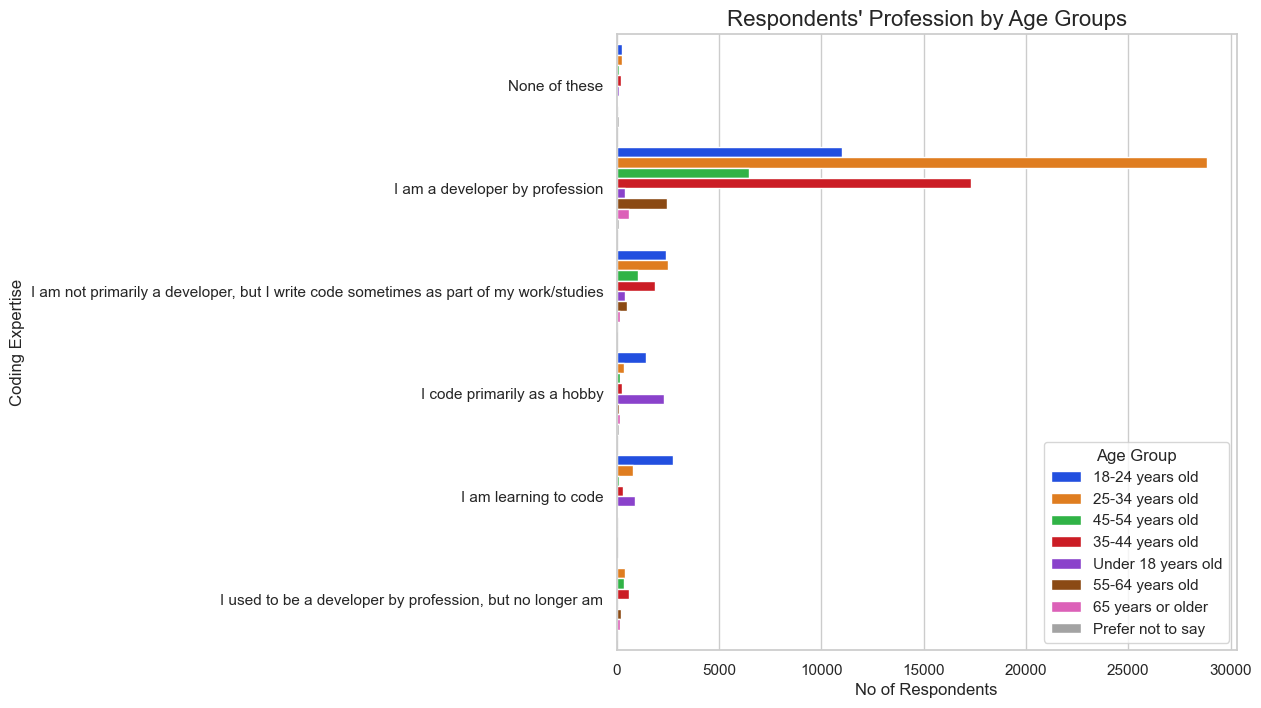

In [16]:
plt.figure(figsize=(8,8))
sns.set_theme(style="whitegrid")
sns.countplot(y = data.MainBranch, hue = data['Age Group'], palette = 'bright')
plt.title("Respondents' Profession by Age Groups", fontsize=16)
plt.ylabel('Coding Expertise')
plt.xlabel('No of Respondents')

**Majority of professional developers are (18-44)years, with 94% of the respondents within (<=54)years. While more teenagers lean towards becoming a developer, it seems the passion delines as one grows older**

<h3 style="color:blue">Developers' EDA & Visualization</h3><hr>

In [17]:
#Filtering the dataset to professional developers only
developer = data[data['MainBranch'] == 'I am a developer by profession']
developer.head(3)

,ResponseId,Q120,MainBranch,Age Group,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time",Hybrid,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Helix,Emacs;Helix,MacOS;Other 

In [18]:
#Checking for the no of unanswered questions by professional developers
developer.isna().sum().sort_values(ascending=False)

AINextVery similar                     65181
AINextSomewhat similar                 62418
AINextNeither different nor similar    62311
AINextVery different                   58178
AIDevWantToWorkWith                    51986
AIToolNot interested in Using          51098
AINextSomewhat different               49405
AIDevHaveWorkedWith                    47197
AIToolInterested in Using              42004
AIToolCurrently Using                  39634
LearnCodeCoursesCert                   38452
AIAcc                                  37874
Industry                               33538
AISearchWantToWorkWith                 32885
SOAI                                   31078
MiscTechWantToWorkWith                 30229
Frequency_3                            29729
Knowledge_8                            29416
Knowledge_7                            29359
Knowledge_5                            29310
Knowledge_6                            29310
Knowledge_2                            29191
Knowledge_

**<u>Question 1</u>:** What is the employment status of developers?

In [19]:
developer.Employment.sample(5)

25914                                  Employed, full-time
62876                                  Employed, full-time
18404    Employed, full-time;Independent contractor, fr...
42299                                  Employed, part-time
10071                                  Employed, full-time
Name: Employment, dtype: object

In [20]:
employment_status = pd.DataFrame(developer.Employment.str.split(pat=";", n=0,  expand = True)[0])

Text(0.5, 1.0, 'Employment Status of Developers')

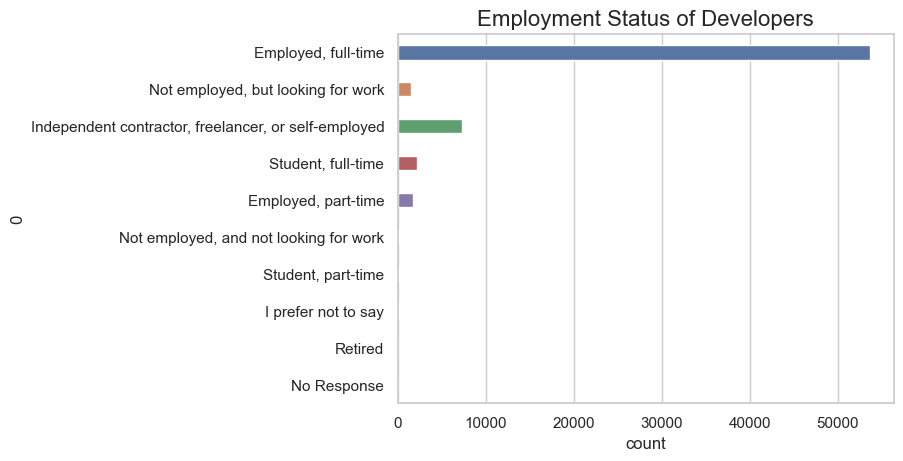

In [21]:
sns.countplot(y = employment_status[0].fillna('No Response'), data = employment_status, width = 0.4)
plt.title('Employment Status of Developers', fontsize=16)

**Almost all professional developers are employed, with a good number working full-time; including fewer freelancers and students.**

**<u>Question 2</u>:** What is the educational level of developers?

Text(0, 0.5, '')

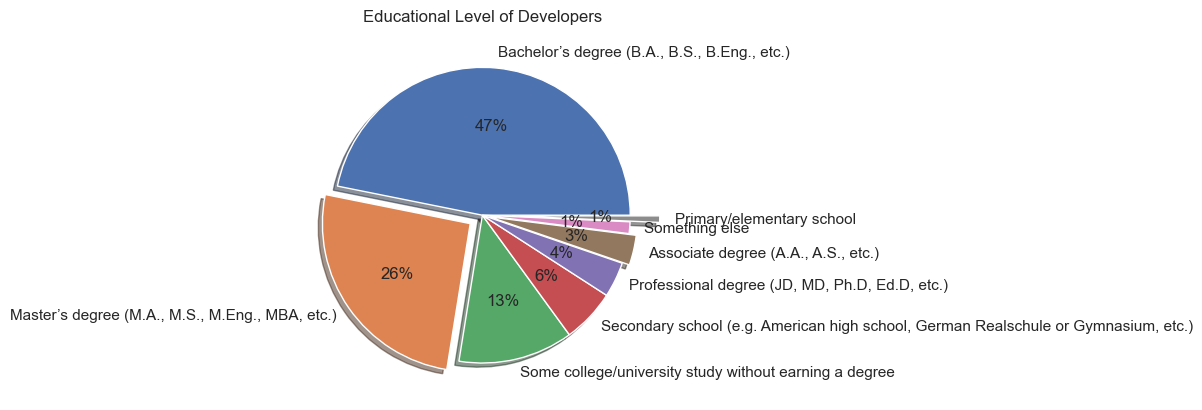

In [22]:
developer['EdLevel'].value_counts().plot(kind = 'pie', explode = [0,0.1,0,0,0,0.05,0,0.2], autopct = '%.0f%%', shadow=True)
plt.title("Educational Level of Developers") 
plt.ylabel('')


**It seems all professional developers must have had a level of education. 86% of the developer passed through at least tertiary institution, comprising of Bachelor's degree (47%), Master's degree (26%) and college/univeristy without degree(13%)**

**<u>Question 3</u>:** What are the job titles of profesional developers?

Text(0, 0.5, 'Job Type')

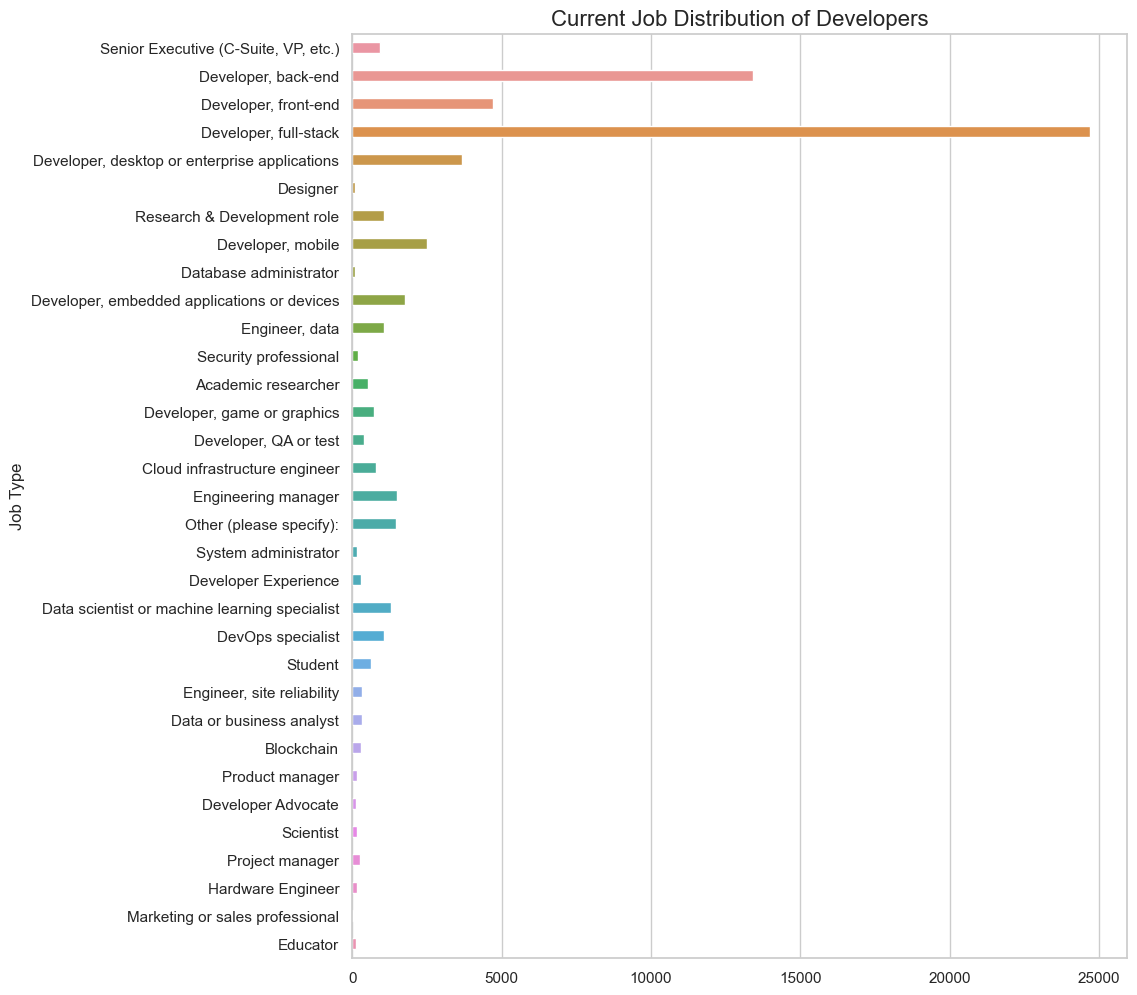

In [23]:
plt.figure(figsize=(10,12))
sns.countplot(y = 'DevType', data = developer, width = 0.4)
plt.title('Current Job Distribution of Developers', fontsize=16)
plt.xlabel('')
plt.ylabel('Job Type')

**Most of our participants are Full-Stack Developers, followed by BackEnd Developer. Overall, Web Developers seem to top the chart, then Engineers and Data Scientists, etc**

**<u>Question 4</u>:** Does Developer job type affect compensation?

In [24]:
# Checking for the different currencies used by developers
developer.Currency.sample(5)

45499    CNY\tChinese Yuan Renminbi
21397             DKK\tDanish krone
64218             INR\tIndian rupee
24125     USD\tUnited States dollar
55612     USD\tUnited States dollar
Name: Currency, dtype: object

In [25]:
data["ConvertedCompYearly"].head(5)

0         NaN
1    285000.0
2    250000.0
3    156000.0
4     23456.0
Name: ConvertedCompYearly, dtype: float64

**The convertedcompYearly column is the conversion of total annual compensation values(salary, bonuses, and perks, before
taxes and deductions) from the native curriencies to dollars**

Text(0.5, 0, 'Developers Job Description')

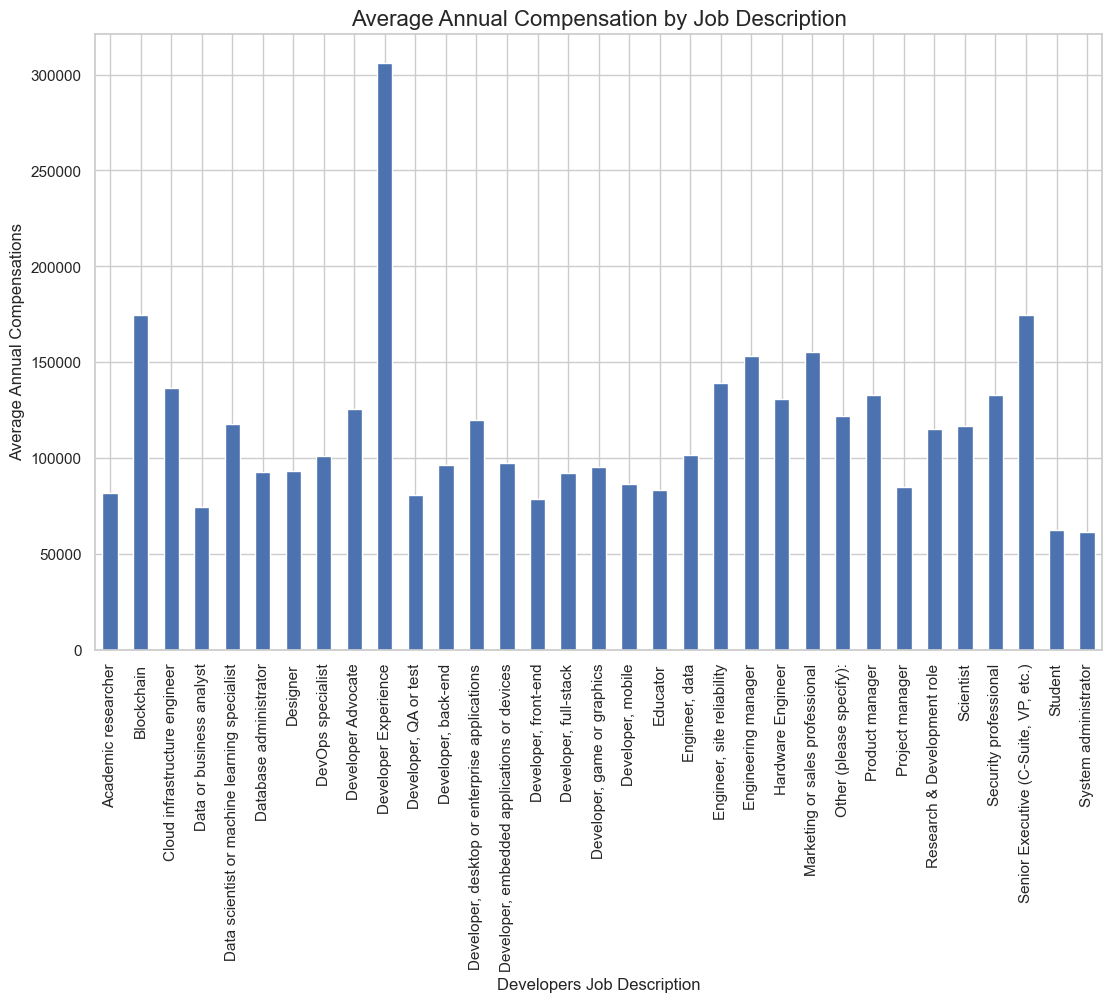

In [26]:
plt.figure(figsize=(13,8))
plt.xticks(rotation=75)
developer.groupby('DevType')['ConvertedCompYearly'].mean().plot(kind = 'bar')
plt.title('Average Annual Compensation by Job Description', fontsize=16)
plt.ylabel('Average Annual Compensations')
plt.xlabel('Developers Job Description')

**On average, Developer Experience type enjoys more compensation than any other developer type, followed by Senior Executives & Blockchain Engineers.**

**<u>Question 5</u>:** How does the need for developers vary across industries?

Text(0.5, 0, '')

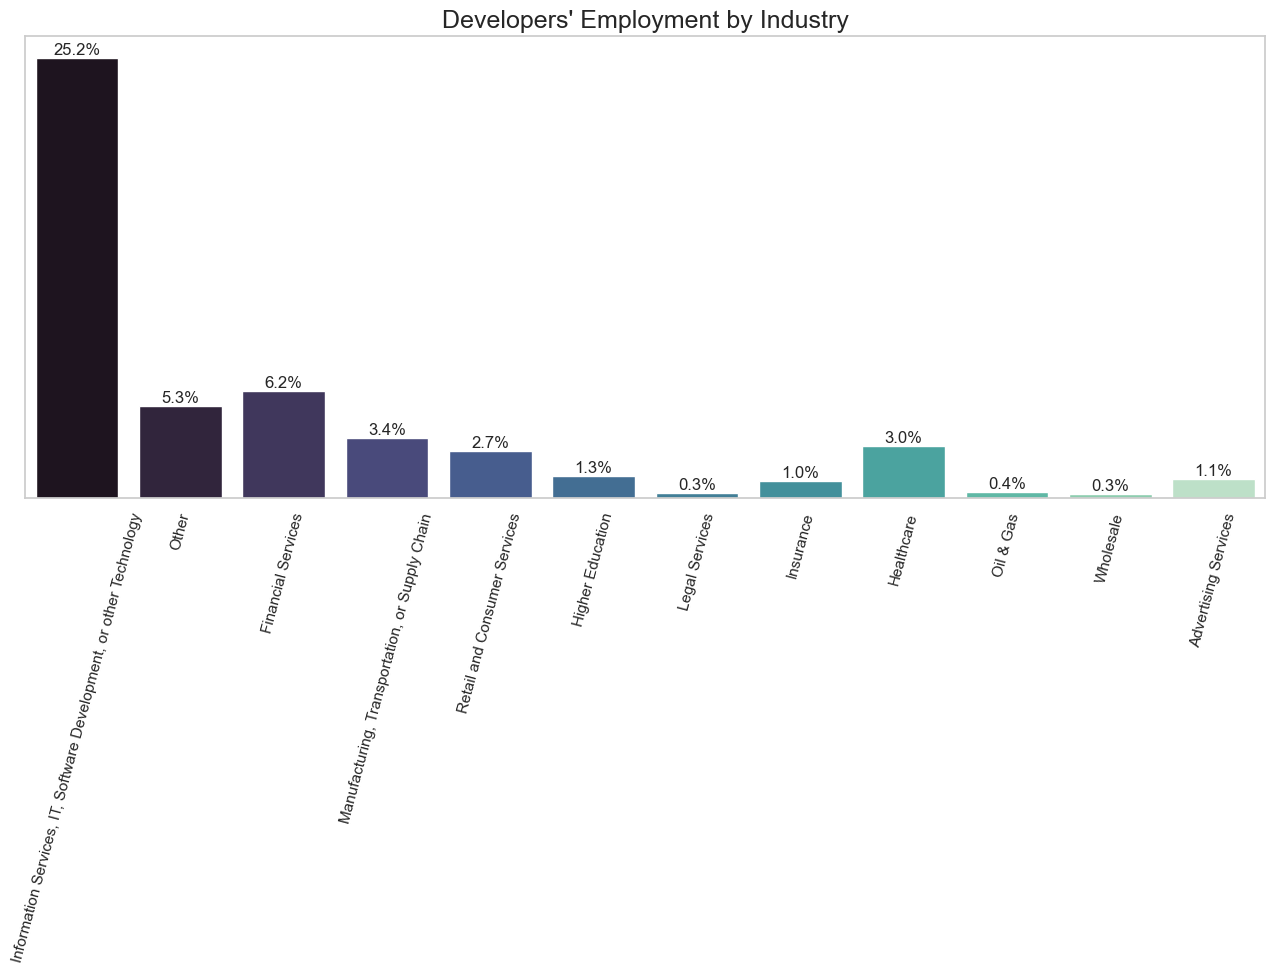

In [27]:
plt.figure(figsize=(16,6))
lp = sns.countplot(x=developer.Industry, palette = 'mako')

#Calculating the percentage value
totalCount = len(developer.Industry)
for i in lp.patches:
    height = i.get_height()
    percentage = (height / totalCount) * 100
    lp.annotate(f'{percentage:.1f}%', (i.get_x() + i.get_width() / 2., height), ha='center', va='bottom')


plt.xticks(rotation=75)
lp.set_yticks([])
plt.title("Developers' Employment by Industry", fontsize=18)
plt.ylabel('')
plt.xlabel('')


**Developers are needed in IT or tech-related industries more than other industries, seconded by financial industries.**

**<u>Question 6</u>:** Do company size affect work situation of developers?

Text(0.5, 0, '')

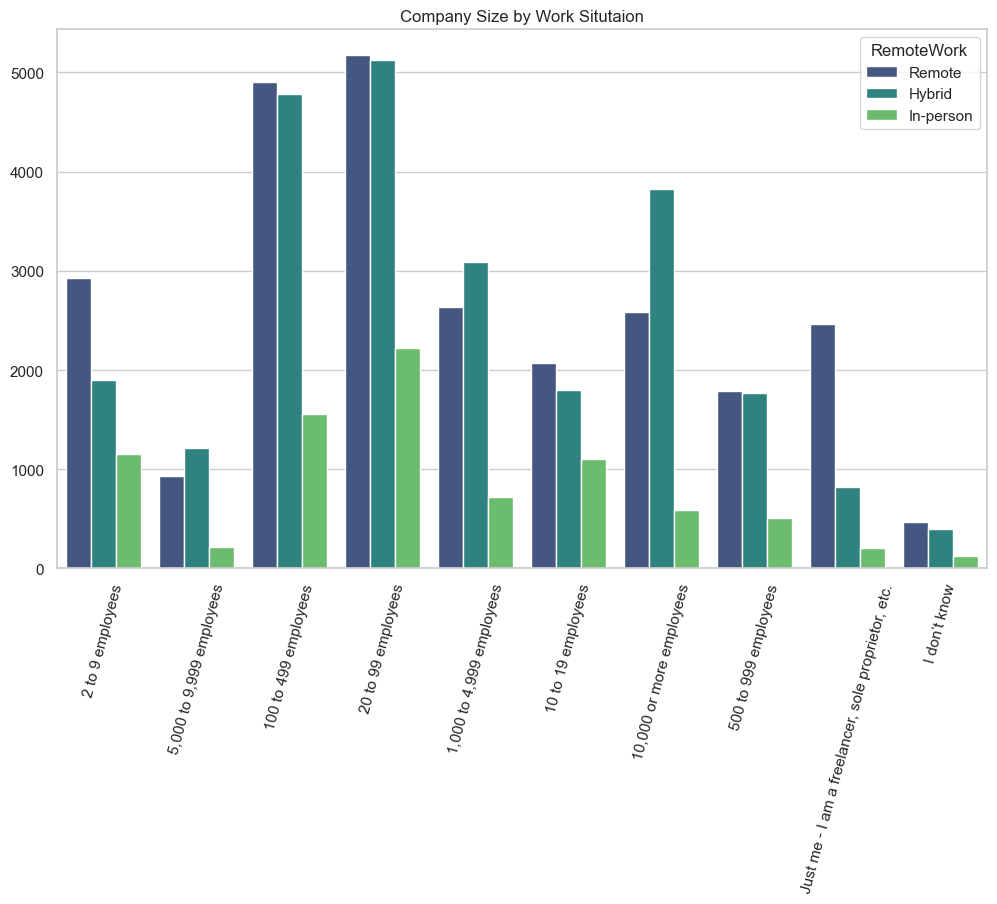

In [28]:
plt.figure(figsize=(12,7))
sns.countplot(x=developer.OrgSize, hue= developer.RemoteWork, palette = 'viridis')
plt.xticks(rotation=75)
plt.title("Company Size by Work Situtaion")
plt.ylabel('')
plt.xlabel('')

**Companies irrespective of the size are leaning towards remote/hybrid work situation for their developer employees.**

In [29]:
developer.sample(3)

,ResponseId,Q120,MainBranch,Age Group,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
85918,85919,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Hybrid,Hobby;School or academic work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Online Courses or Certification;On the job tra...,Books;Recorded coding sessions;How-to videos;V...,Other;Udemy,10,4,"Developer, full-stack","1,000 to 4,999 employees",I have some influence,Investigate,Start a free trial;Ask developers I know/work ...,Romania,RON\tRomanian leu,NaN,HTML/CSS;Java;JavaScript;Kotlin;Solidity;SQL;T...,Go,Cosmos DB;Dynamodb;MySQL;Redis,Neo4J;Redis,Amazon Web Services (AWS);Digital Ocean;Micros...,Amazon Web Services (AWS);Firebase;Google Clou...,Angular;Express;NestJS;Node.js;Spring Boot,Angular;Deno;Express;Fastify;NestJS;Next.js;No...,NaN,NaN,npm;Pacman;Terraform;Vite;Webpack;Yarn,Chocolatey;npm;Pacman;Terraform;Unreal Engine;...,DataGrip;Goland;IntelliJ IDEA;Notepad++;Visual...,DataGrip;Goland;IntelliJ IDEA;Notepad++;Visual...,Arch;Windows;Windows Subsystem for Linux (WSL),Windows;Windows Subsystem for Linux (WSL),GitHub Discussions;Jira;Markdown File,Markdown File,Discord;Microsoft Teams;Slack,Discord;Slack,ChatGPT,ChatGPT,AWS CodeWhisperer,AWS CodeWhisperer,Stack Overflow;Stack Exchange,A few times per week,Not sure/can't remember,NaN,Neutral,"A good idea, I feel the scope of stackoverflow...",Yes,Favorable,Increase productivity;Greater efficiency;Speed...,Somewhat distrust,Learning about a codebase;Project planning;Tes...,Writing code;Documenting code;Debugging and ge...,Collaborating with teammates,Documenting code,NaN,NaN,NaN,Writing code;Debugging and getting help,Yes,Individual contributor,4.0,Agree,Agree,Strongly agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Neither agree nor disagree,Never,1-2 times a week,NaN,30-60 minutes a day,60-120 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,NaN
4127,4128,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Hybrid,Professional development or self-paced learnin...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Pluralsight,26,22,"Developer, full-stack",20 to 99 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,222000.0,C#;PowerShell;SQL,C#;R;SQL,Elasticsearch;Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Redis;Snowf...,NaN,NaN,ASP.NET CORE;Blazor,ASP.NET CORE;Blazor,.NET (5+) ;.NET Fra

**<u>Question 7</u>:** What's the top 15  programming, scripting, and markup languages developers want to work with next year?

In [30]:
developer.LanguageWantToWorkWith.head(3)

1    Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...
2                                   Haskell;OCaml;Rust
3    Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...
Name: LanguageWantToWorkWith, dtype: object

In [31]:
Devlang = developer['LanguageWantToWorkWith']

#Deleting null values
Devlang = Devlang.dropna()

In [32]:
Devlang = Devlang.str.split(';', expand = True)

In [33]:
stackedLang = Devlang.stack()

In [34]:
langFuture = pd.DataFrame(data = stackedLang).reset_index()
langFuture.columns = ['id', 'no', 'Developer_Languages']
langFuture.head()

,id,no,Developer_Languages
0,1,0,Bash/Shell (all shells)
1,1,1,C#
2,1,2,Dart
3,1,3,Elixir
4,1,4,GDScript


In [35]:
langFuture.Developer_Languages.value_counts()

Developer_Languages
JavaScript                 27039
TypeScript                 26569
Python                     24371
SQL                        23477
HTML/CSS                   22709
Rust                       20479
C#                         14770
Go                         14590
Bash/Shell (all shells)    13653
Java                       10761
C++                         9165
Kotlin                      8242
C                           6147
PHP                         5944
Dart                        4542
PowerShell                  4460
Swift                       4174
Ruby                        3371
Elixir                      3255
Lua                         2576
Zig                         2574
Scala                       2347
Haskell                     2290
Assembly                    2098
F#                          1727
R                           1652
Clojure                     1508
Delphi                      1447
Julia                       1242
Solidity               

Text(0.5, 0, 'Languages')

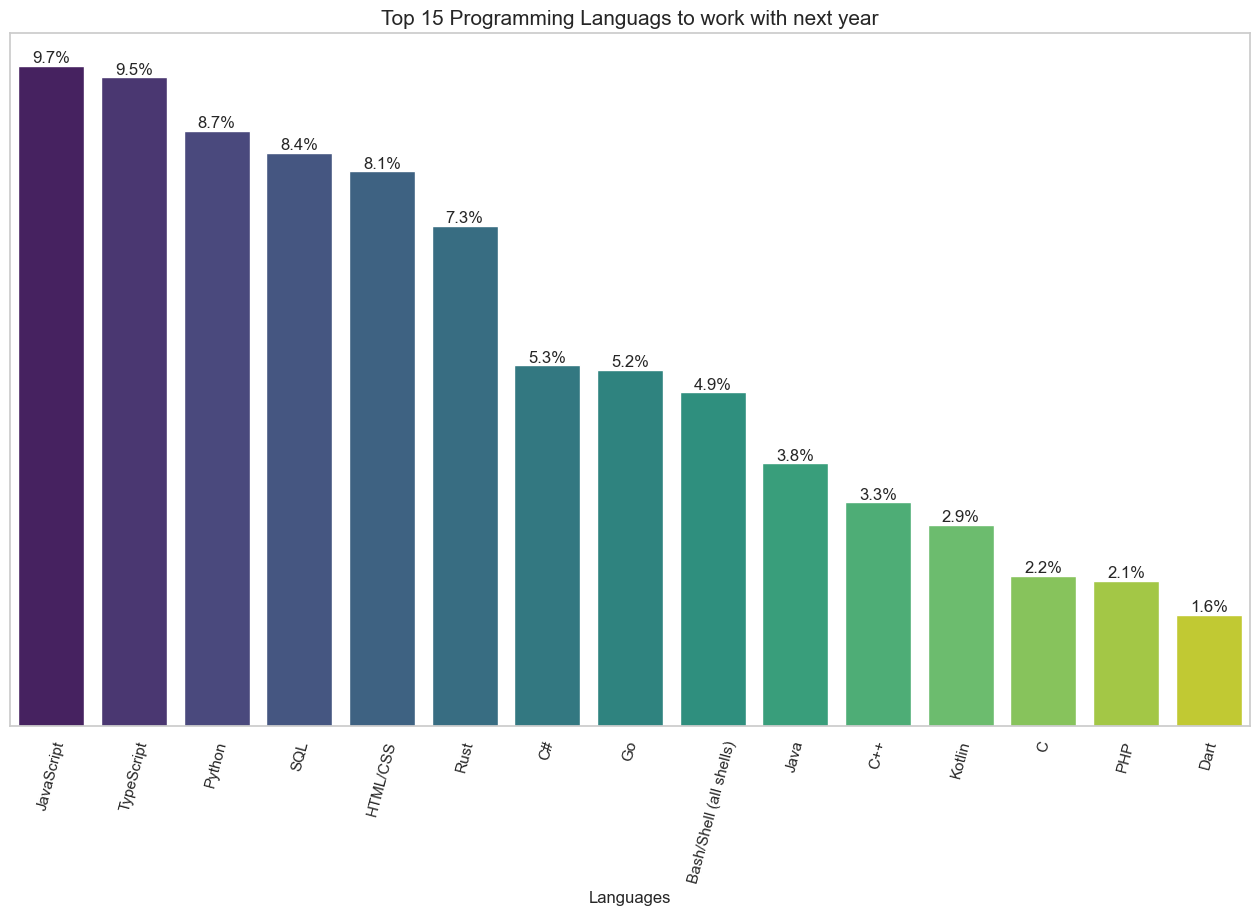

In [36]:
top_15_languages = langFuture.Developer_Languages.value_counts().sort_values(ascending=False).head(15)

plt.figure(figsize=(16,9))
sns.set_theme(style="whitegrid")
lp = sns.barplot(x = top_15_languages.index, y=top_15_languages, palette = 'viridis')

#Calculating the percentage value
totalCount = len(langFuture.Developer_Languages)
for i in lp.patches:
    height = i.get_height()
    percentage = (height / totalCount) * 100
    lp.annotate(f'{percentage:.1f}%', (i.get_x() + i.get_width() / 2., height), ha='center', va='bottom')


plt.xticks(rotation=75)
lp.set_yticks([])
plt.title('Top 15 Programming Languags to work with next year', fontsize = 15)
plt.ylabel('')
plt.xlabel('Languages', fontsize=12)

**JavaScript, TypeScript and Python tops the most popular language developers want to work with in 2024**

In [37]:
developer.sample(3)

,ResponseId,Q120,MainBranch,Age Group,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
3992,3993,I agree,I am a developer by profession,18-24 years old,"Employed, full-time",Hybrid,Hobby,"Associate degree (A.A., A.S., etc.)","Other online resources (e.g., videos, blogs, f...",Formal documentation provided by the owner of ...,NaN,5,3,"Developer, full-stack",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,25000.0,HTML/CSS;JavaScript;PHP;SQL;TypeScript,C#;HTML/CSS;JavaScript;SQL;TypeScript,MySQL,MySQL,NaN,NaN,Express;Node.js,Express;NestJS;Node.js;React,NaN,NaN,Homebrew;npm;Vite,Homebrew;npm;Unity 3D;Vite,IntelliJ IDEA;Visual Studio Code,Visual Studio Code,MacOS,MacOS,Jira,Jira,Microsoft Teams,Microsoft Teams,ChatGPT,ChatGPT,GitHub Copilot,GitHub Copilot,Stack Overflow,Daily or almost daily,No,NaN,Neutral,NaN,Yes,Very favorable,Increase productivity;Speed up learning,Somewhat trust,Documenting code;Testing code,Learning about a codebase;Writing code,NaN,NaN,NaN,NaN,NaN,Learning about a codebase;Writing code,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,31035.0
47134,47135,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",In-person,Professional development or self-paced learnin...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other;Codecademy;Udemy;Coursera,14,11,"Developer, full-stack",20 to 99 employees,I have some influence,Investigate,Start a free trial;Ask developers I know/work ...,Japan,JPY\tJapanese yen,NaN,Assembly;Bash/Shell (all shells);C;C#;C++;Go;H...,Bash/Shell (all shells);Go;HTML/CSS;JavaScript...,Dynamodb;Elasticsearch;MariaDB;Microsoft Acces...,Elasticsearch;MariaDB;MongoDB;MySQL;Redis;SQLite,Amazon Web Services (AWS);Cloudflare;Google Cloud,Amazon Web Services (AWS);Google Cloud,ASP.NET;CodeIgniter;Django;Drupal;jQuery;Larav...,jQuery;Laravel;React,.NET Framework (1.0 - 4.8);RabbitMQ,RabbitMQ,Docker;npm,Docker;npm,Android Studio;Atom;Eclipse;IntelliJ IDEA;Netb...,IntelliJ IDEA;Notepad++;PhpStorm;PyCharm;Vim,Android;Debian;Fedora;iOS;iPadOS;MacOS;Other L...,Ubuntu,GitHub Discussions;Jira;Miro,GitHub Discussions;Jira;Miro,Google Chat;Google Meet;Microsoft Teams;Skype;...,Google Chat;Google Meet;Skype;Slack;Zoom,ChatGPT,ChatGPT,Mintlify,Mintlify,Stack Overflow;Stack Exchange;Collectives on S...,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",The text content in the questions and answers ...,"No, but I plan to soon",Favorable,NaN

**<u>Question 8</u>:** What's the top 15  database environments developers want to work with next year?

In [38]:
developer.DatabaseWantToWorkWith.head(3)

1    Firebase Realtime Database;Supabase
2                                    NaN
3                       PostgreSQL;Redis
Name: DatabaseWantToWorkWith, dtype: object

In [39]:
DataEnv = developer['DatabaseWantToWorkWith']

#Deleting null values
DataEnv = DataEnv.dropna()

In [40]:
DataEnv = DataEnv.str.split(';', expand = True)

In [41]:
stackedEnv = DataEnv.stack()

In [42]:
EnvFuture = pd.DataFrame(data = stackedEnv).reset_index()
EnvFuture.columns = ['id', 'no', 'DataBase_Environments']
EnvFuture.head()

,id,no,DataBase_Environments
0,1,0,Firebase Realtime Database
1,1,1,Supabase
2,3,0,PostgreSQL
3,3,1,Redis
4,4,0,Elasticsearch


In [43]:
EnvFuture.DataBase_Environments.value_counts()

DataBase_Environments
PostgreSQL                    26471
Redis                         14735
MySQL                         13522
SQLite                        13087
MongoDB                       12960
Microsoft SQL Server           9771
Elasticsearch                  8675
MariaDB                        6491
Dynamodb                       5014
Firebase Realtime Database     3100
Supabase                       2973
Cassandra                      2970
BigQuery                       2944
Cloud Firestore                2741
Oracle                         2644
Cosmos DB                      2397
Neo4J                          1977
Snowflake                      1894
Cockroachdb                    1566
InfluxDB                       1308
H2                             1224
Clickhouse                     1093
DuckDB                          832
Couch DB                        797
Firebird                        710
Solr                            658
Datomic                         507
Micros

Text(0.5, 0, 'Database Environments')

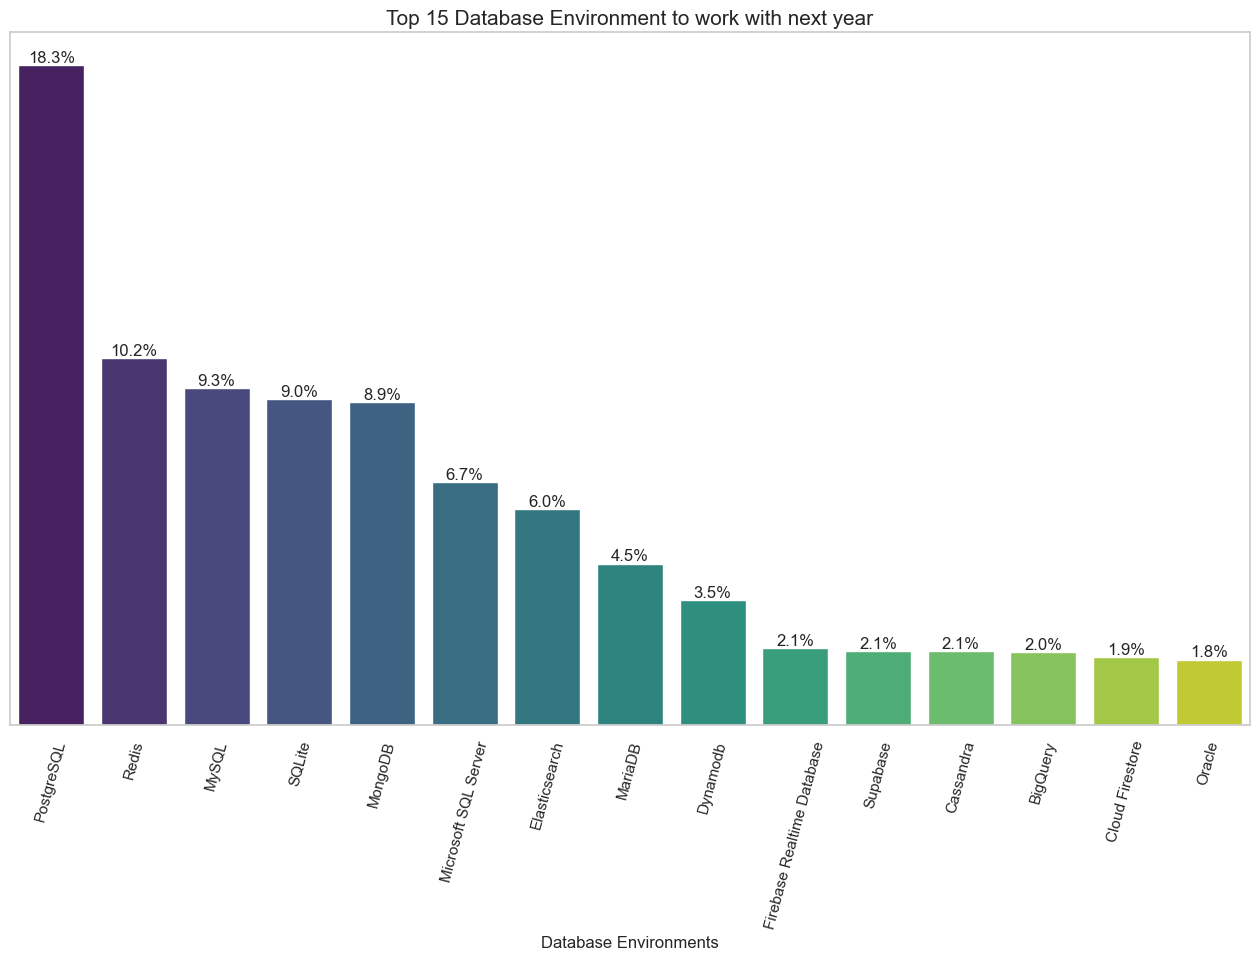

In [44]:
top_15_Env = EnvFuture.DataBase_Environments.value_counts().sort_values(ascending=False).head(15)

plt.figure(figsize=(16,9))
sns.set_theme(style="whitegrid")
lp = sns.barplot(x = top_15_Env.index, y=top_15_Env, palette = 'viridis')

#Calculating the percentage value
totalCount = len(EnvFuture.DataBase_Environments)
for i in lp.patches:
    height = i.get_height()
    percentage = (height / totalCount) * 100
    lp.annotate(f'{percentage:.1f}%', (i.get_x() + i.get_width() / 2., height), ha='center', va='bottom')


plt.xticks(rotation=75)
lp.set_yticks([])
plt.title('Top 15 Database Environment to work with next year', fontsize = 15)
plt.ylabel('')
plt.xlabel('Database Environments', fontsize=12)

**PostgreSQL, Redis and MySQL tops the most popular database environment developers want to work with in 2024**

**<u>Question 9</u>:** What's the top 15 cloud platforms developers want to work with next year?

In [45]:
developer.PlatformWantToWorkWith.head(3)

1    Fly.io;Netlify;Render
2                      NaN
3        Cloudflare;Heroku
Name: PlatformWantToWorkWith, dtype: object

In [46]:
CloudPlatform = developer['PlatformWantToWorkWith']

#Deleting null values
CloudPlatform = CloudPlatform.dropna()

In [47]:
CloudPlatform = CloudPlatform.str.split(';', expand = True)

In [48]:
stackedCloud = CloudPlatform.stack()

In [49]:
CloudFuture = pd.DataFrame(data = stackedCloud).reset_index()
CloudFuture.columns = ['id', 'no', 'Cloud_Platforms']
CloudFuture.head()

,id,no,Cloud_Platforms
0,1,0,Fly.io
1,1,1,Netlify
2,1,2,Render
3,3,0,Cloudflare
4,3,1,Heroku


In [50]:
CloudFuture.Cloud_Platforms.value_counts()

Cloud_Platforms
Amazon Web Services (AWS)            23228
Microsoft Azure                      12276
Google Cloud                         11138
Cloudflare                            7683
Vercel                                6437
Firebase                              6431
Digital Ocean                         5897
Netlify                               3453
Hetzner                               2249
Heroku                                2220
Fly.io                                2201
Linode, now Akamai                    2077
VMware                                1824
OVH                                   1197
Managed Hosting                       1184
OpenShift                             1173
Oracle Cloud Infrastructure (OCI)      952
Render                                 876
OpenStack                              868
Vultr                                  792
IBM Cloud Or Watson                    493
Scaleway                               469
Colocation                            

Text(0.5, 0, 'Cloud Platforms')

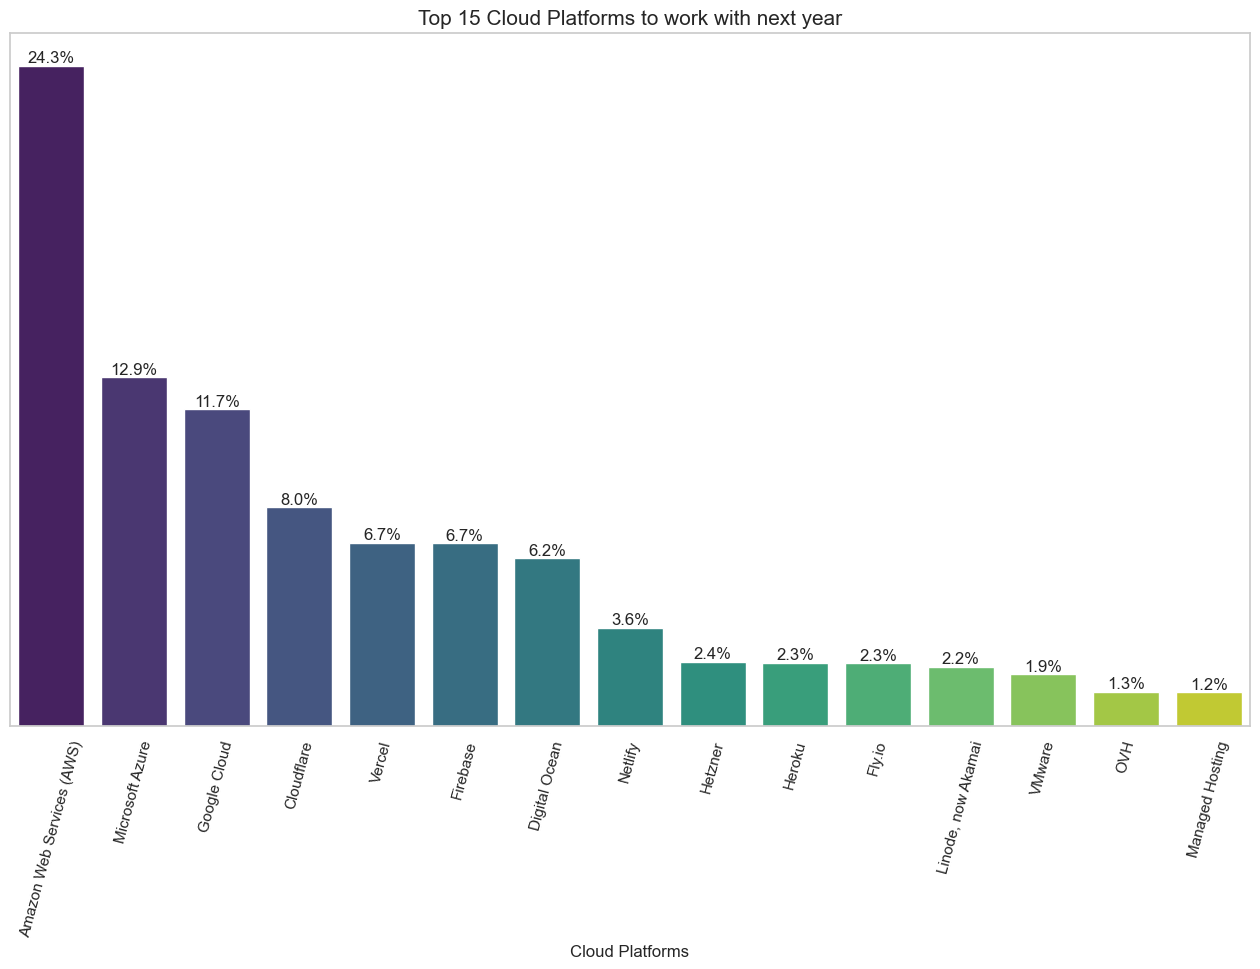

In [51]:
top_15_Clouds = CloudFuture.Cloud_Platforms.value_counts().sort_values(ascending=False).head(15)

plt.figure(figsize=(16,9))
sns.set_theme(style="whitegrid")
lp = sns.barplot(x = top_15_Clouds.index, y=top_15_Clouds, palette = 'viridis')

#Calculating the percentage value
totalCount = len(CloudFuture.Cloud_Platforms)
for i in lp.patches:
    height = i.get_height()
    percentage = (height / totalCount) * 100
    lp.annotate(f'{percentage:.1f}%', (i.get_x() + i.get_width() / 2., height), ha='center', va='bottom')


plt.xticks(rotation=75)
lp.set_yticks([])
plt.title('Top 15 Cloud Platforms to work with next year', fontsize = 15)
plt.ylabel('')
plt.xlabel('Cloud Platforms', fontsize=12)

**Amazon Web Services, Microsoft Azure and Goggle Cloud tops the chart of Cloud Platforms developers want to work with in 2024**

**<u>Question 10</u>:** What's the top 15 web frameworks and technologies developers want to work with next year?

In [52]:
developer.PlatformWantToWorkWith.head(3)

1    Fly.io;Netlify;Render
2                      NaN
3        Cloudflare;Heroku
Name: PlatformWantToWorkWith, dtype: object

In [53]:
WebFrame = developer['WebframeWantToWorkWith']

#Deleting null values
WebFrame = WebFrame.dropna()

In [54]:
WebFrame = WebFrame.str.split(';', expand = True)

In [55]:
stackedWeb = WebFrame.stack()

In [56]:
WebFuture = pd.DataFrame(data = stackedWeb).reset_index()
WebFuture.columns = ['id', 'no', 'Web_Frameworks']
WebFuture.head()

,id,no,Web_Frameworks
0,1,0,Deno
1,1,1,Elm
2,1,2,Nuxt.js
3,1,3,React
4,1,4,Svelte


In [57]:
WebFuture.Web_Frameworks.value_counts()

Web_Frameworks
React             19922
Node.js           18092
Next.js           11296
Vue.js             9819
ASP.NET CORE       9001
Angular            7975
Svelte             7572
Express            7174
Spring Boot        5736
Django             5029
FastAPI            4814
jQuery             4433
Blazor             4039
Flask              3848
Deno               3807
ASP.NET            3617
NestJS             3569
Laravel            3338
Ruby on Rails      2905
Solid.js           2760
Nuxt.js            2715
WordPress          2714
Phoenix            1988
Remix              1910
AngularJS          1820
Qwik               1708
Symfony            1412
Fastify            1395
Elm                 863
Gatsby              831
Lit                 537
Drupal              388
CodeIgniter         339
Play Framework      265
Name: count, dtype: int64

Text(0.5, 0, 'Web_Frameworks/Technologies')

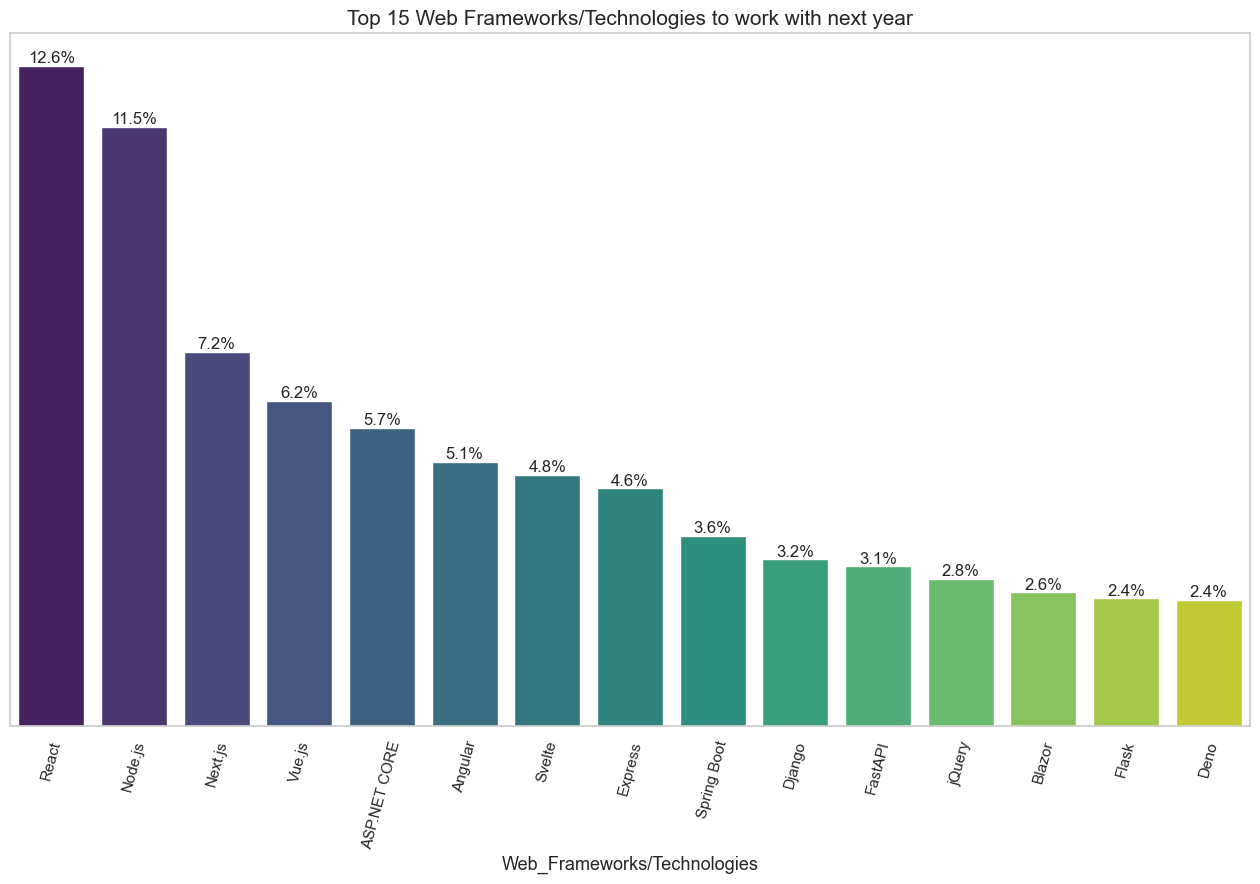

In [58]:
top_15_Web = WebFuture.Web_Frameworks.value_counts().sort_values(ascending=False).head(15)

plt.figure(figsize=(16,9))
sns.set_theme(style="whitegrid")
lp = sns.barplot(x = top_15_Web.index, y = top_15_Web, palette = 'viridis')

#Calculating the percentage value
totalCount = len(WebFuture.Web_Frameworks)
for i in lp.patches:
    height = i.get_height()
    percentage = (height / totalCount) * 100
    lp.annotate(f'{percentage:.1f}%', (i.get_x() + i.get_width() / 2., height), ha='center', va='bottom')


plt.xticks(rotation=75)
lp.set_yticks([])
plt.title('Top 15 Web Frameworks/Technologies to work with next year', fontsize = 15)
plt.ylabel('')
plt.xlabel('Web_Frameworks/Technologies', fontsize=13)

**React, Vue and Angular tops the list of frameworks and technologies web developers want to work with in 2024**

**<u>Question 11</u>:** What's the top 15 compiling, building and testing tools developers want to work with next year?

In [60]:
developer.ToolsTechWantToWorkWith.head(3)

1    Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...
2                                 Cargo;Kubernetes;Nix
3                                    Homebrew;npm;Vite
Name: ToolsTechWantToWorkWith, dtype: object

In [61]:
TestTools = developer['ToolsTechWantToWorkWith']

#Deleting null values
TestTools = TestTools.dropna()

In [62]:
TestTools = TestTools.str.split(';', expand = True)

In [63]:
stackedTest = TestTools.stack()

In [64]:
TestFuture = pd.DataFrame(data = stackedTest).reset_index()
TestFuture.columns = ['id', 'no', 'Test_Tools']
TestFuture.head()

,id,no,Test_Tools
0,1,0,Godot
1,1,1,npm
2,1,2,pnpm
3,1,3,Unity 3D
4,1,4,Unreal Engine


In [65]:
TestFuture.Test_Tools.value_counts()

Test_Tools
Docker                    30946
npm                       20040
Kubernetes                16664
Homebrew                  10600
Vite                      10529
Pip                       10198
Yarn                       9441
Cargo                      8978
Terraform                  8944
Make                       7525
NuGet                      7519
Visual Studio Solution     6614
Webpack                    6419
Gradle                     5971
Maven (build tool)         5640
Ansible                    4988
pnpm                       4660
MSBuild                    4656
CMake                      4584
GNU GCC                    4566
Unity 3D                   3828
LLVM's Clang               3741
Unreal Engine              3482
Podman                     3389
Composer                   3357
APT                        2853
Chocolatey                 2634
Pacman                     2578
Godot                      2355
Nix                        1922
Bun                        17

Text(0.5, 0, 'Compiling, Building and Testing Tools')

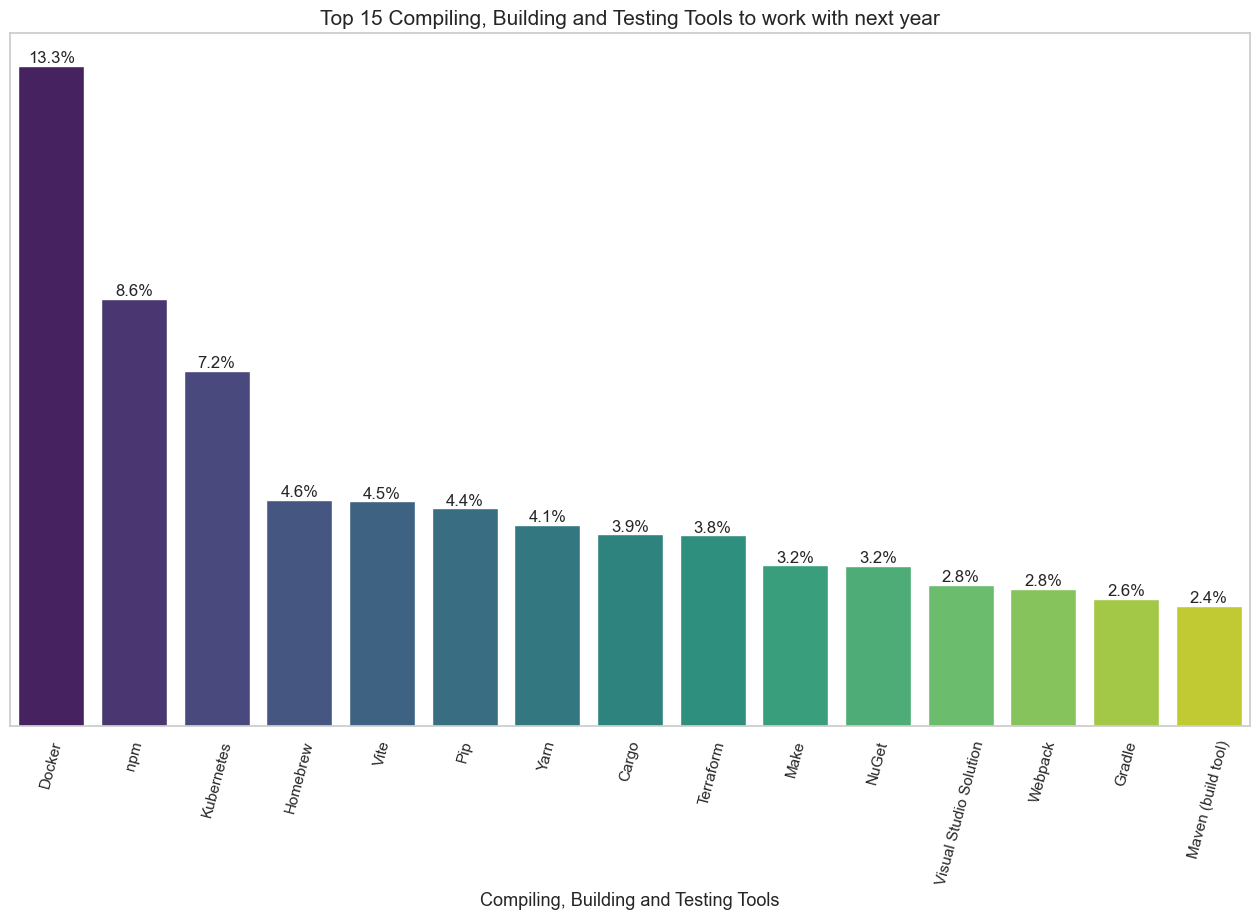

In [66]:
top_15_Test = TestFuture.Test_Tools.value_counts().sort_values(ascending=False).head(15)

plt.figure(figsize=(16,9))
sns.set_theme(style="whitegrid")
lp = sns.barplot(x = top_15_Test.index, y = top_15_Test, palette = 'viridis')

#Calculating the percentage value
totalCount = len(TestFuture.Test_Tools)
for i in lp.patches:
    height = i.get_height()
    percentage = (height / totalCount) * 100
    lp.annotate(f'{percentage:.1f}%', (i.get_x() + i.get_width() / 2., height), ha='center', va='bottom')


plt.xticks(rotation=75)
lp.set_yticks([])
plt.title('Top 15 Compiling, Building and Testing Tools to work with next year', fontsize = 15)
plt.ylabel('')
plt.xlabel('Compiling, Building and Testing Tools', fontsize=13)

**Docker, NPM, and Kubernetes tops the list of Compiling, Building and Testing Tools developers want to work with in 2024**

**<u>Question 12</u>:** Do developers use AI tools and how favorable are their stance on using AI tools?

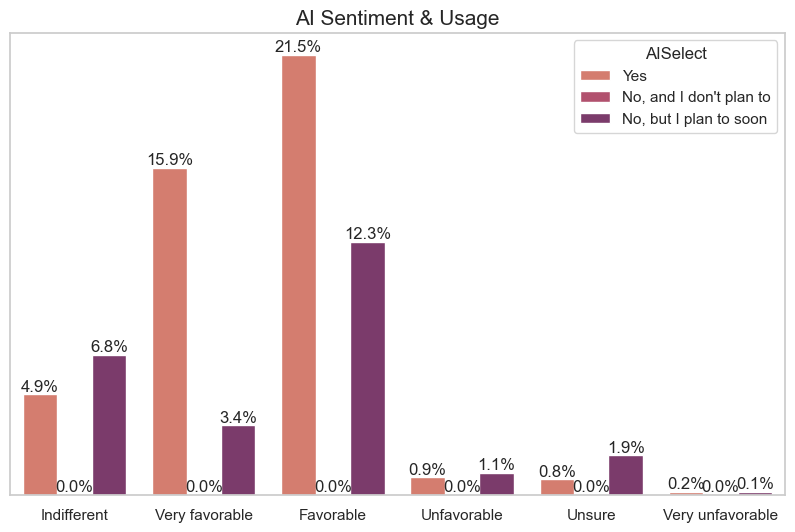

In [67]:
plt.figure(figsize=(10,6))
lp = sns.countplot(x = developer.AISent, hue=developer.AISelect, palette = 'flare')

#Calculating the percentage value
totalCount = len(developer)
for i in lp.patches:
    height = i.get_height()
    percentage = (height / totalCount) * 100
    lp.annotate(f'{percentage:.1f}%', (i.get_x() + i.get_width() / 2., height), ha='center', va='bottom')

plt.title('AI Sentiment & Usage', fontsize=15)
plt.xlabel('')
plt.ylabel('')
lp.set_yticks([])
plt.show()

**The highest percentage of developers have a very favorable sentiment towards AI Tools while a smaller percentage have an unfavorable sentiment towards it, regardless of usage. Overall, there's a positive sentiment towards AI among developers who have adopted it.**


**<u>Question 13</u>:** What workflow do developers anticipate will make a very big difference in just 1 year from now as a result of the AI tools they are currently using?

In [68]:
Very_different = developer['AINextVery different']

#Deleting null values
Very_different = Very_different.dropna()

In [69]:
Very_different.head()

112    Writing code;Documenting code;Debugging and ge...
143           Learning about a codebase;Documenting code
153    Learning about a codebase;Project planning;Wri...
183                                         Testing code
207    Project planning;Writing code;Documenting code...
Name: AINextVery different, dtype: object

In [70]:
Very_different = Very_different.str.split(';', expand = True)

In [71]:
stacked = Very_different.stack()

In [72]:
workflow = pd.DataFrame(data = stacked).reset_index()
workflow.columns = ['id', 'check', 'use']
workflow.head()

,id,check,use
0,112,0,Writing code
1,112,1,Documenting code
2,112,2,Debugging and getting help
3,143,0,Learning about a codebase
4,143,1,Documenting code


Text(0.5, 0, '')

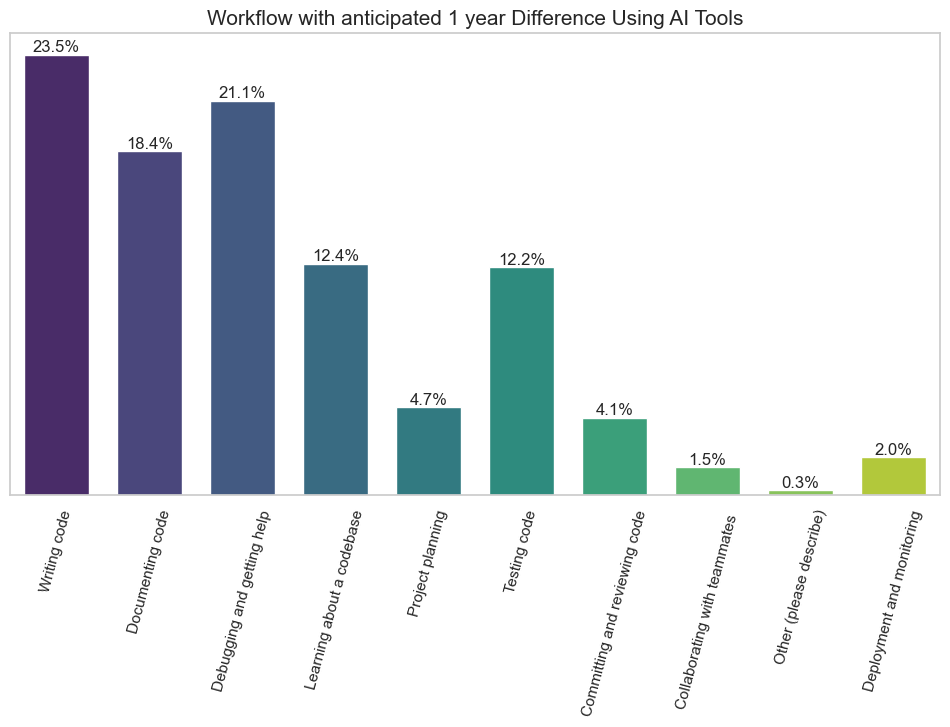

In [73]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
lp = sns.countplot(x = 'use', data = workflow, width = 0.7, palette = 'viridis')


#Calculating the percentage value
totalCount = len(workflow.id)
for i in lp.patches:
    height = i.get_height()
    percentage = (height / totalCount) * 100
    lp.annotate(f'{percentage:.1f}%', (i.get_x() + i.get_width() / 2., height), ha='center', va='bottom')


plt.xticks(rotation=75)
lp.set_yticks([])
plt.title('Workflow with anticipated 1 year Difference Using AI Tools', fontsize = 15)
plt.ylabel('')
plt.xlabel('')

**Overall, AI Tools is projected to enhance workflow efficiency(especially in code related area) within a year.** 

**<u>Question 14</u>:** Which AI-powered developer tools do developers want to work with over the next year?

In [74]:
developer.AIDevWantToWorkWith.head(3)

1    GitHub Copilot
2               NaN
3               NaN
Name: AIDevWantToWorkWith, dtype: object

In [75]:
AIDevFuture = developer['AIDevWantToWorkWith']

#Deleting null values
AIDevFuture = AIDevFuture.dropna()

In [76]:
AIDevFuture = AIDevFuture.str.split(';', expand = True)

In [77]:
stackedDev = AIDevFuture.stack()

In [78]:
DevFuture = pd.DataFrame(data = stackedDev).reset_index()
DevFuture.columns = ['id', 'no', 'AI_Developer_Tool']
DevFuture.head()

,id,no,AI_Developer_Tool
0,1,0,GitHub Copilot
1,7,0,GitHub Copilot
2,9,0,AWS CodeWhisperer
3,9,1,GitHub Copilot
4,11,0,GitHub Copilot


Text(0.5, 0, 'AI-powered developer tools')

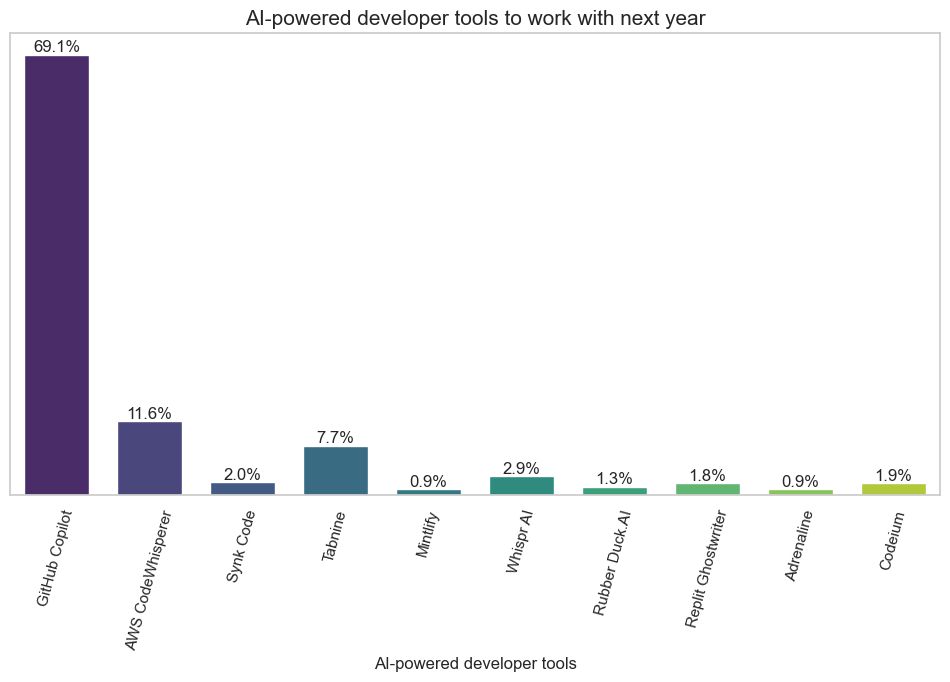

In [79]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
lp = sns.countplot(x = 'AI_Developer_Tool', data=DevFuture, width = 0.7, palette = 'viridis')


#Calculating the percentage value
totalCount = len(DevFuture.no)
for i in lp.patches:
    height = i.get_height()
    percentage = (height / totalCount) * 100
    lp.annotate(f'{percentage:.1f}%', (i.get_x() + i.get_width() / 2., height), ha='center', va='bottom')


plt.xticks(rotation=75)
lp.set_yticks([])
plt.title('AI-powered developer tools to work with next year', fontsize = 15)
plt.ylabel('')
plt.xlabel('AI-powered developer tools', fontsize=12)

**A significant 69.1% of developers prefer using GitHub Copilot for their projects in 2024**

**<u>Question 15</u>:** Which AI-powered search tools do developers want to work with over the next year?

In [80]:
developer.AISearchWantToWorkWith.head(3)

1    ChatGPT;Neeva AI
2                 NaN
3                 NaN
Name: AISearchWantToWorkWith, dtype: object

In [81]:
AISearchFuture = developer['AISearchWantToWorkWith']

#Deleting null values
AISearchFuture = AISearchFuture.dropna()

In [82]:
AISearchFuture = AISearchFuture.str.split(';', expand = True)

In [83]:
stackedSearch = AISearchFuture.stack()

In [84]:
SearchFuture = pd.DataFrame(data = stackedSearch).reset_index()
SearchFuture.columns = ['id', 'no', 'AI_Search_Tool']
SearchFuture.head()

,id,no,AI_Search_Tool
0,1,0,ChatGPT
1,1,1,Neeva AI
2,4,0,ChatGPT
3,7,0,ChatGPT
4,7,1,Neeva AI


In [85]:
SearchFuture.AI_Search_Tool.value_counts()

AI_Search_Tool
ChatGPT           31405
Google Bard AI     8737
Bing AI            8390
WolframAlpha       4543
Phind              1595
You.com             830
Perplexity AI       643
Quora Poe           471
Neeva AI            325
Metaphor            280
Andi                246
Name: count, dtype: int64

Text(0.5, 0, 'AI-powered search tools')

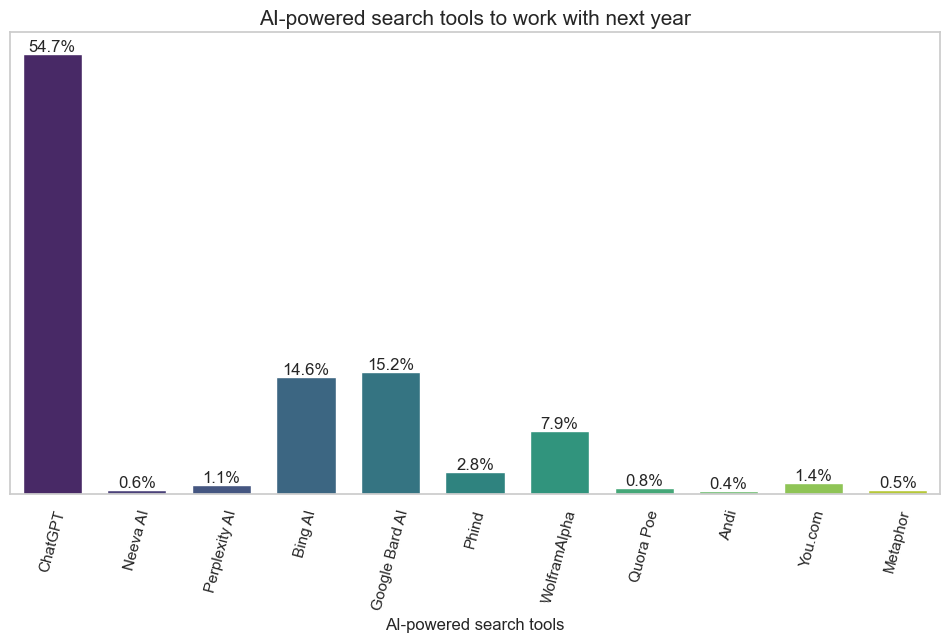

In [86]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
lp = sns.countplot(x = 'AI_Search_Tool', data=SearchFuture, width = 0.7, palette = 'viridis')


#Calculating the percentage value
totalCount = len(SearchFuture.no)
for i in lp.patches:
    height = i.get_height()
    percentage = (height / totalCount) * 100
    lp.annotate(f'{percentage:.1f}%', (i.get_x() + i.get_width() / 2., height), ha='center', va='bottom')


plt.xticks(rotation=75)
lp.set_yticks([])
plt.title('AI-powered search tools to work with next year', fontsize = 15)
plt.ylabel('')
plt.xlabel('AI-powered search tools', fontsize=12)

**A significant 54.7% of developers prefer to use ChatGPT in 2024 than other AI Search tool**